In [1]:
import matplotlib.pyplot as plt

In [2]:
filename = 'scaling.txt'

In [3]:
configs = {}
current_config = None
with open(filename, 'r') as file:
    for line in file:
        line = line.strip()
        if line.startswith("# TL"):
            current_config = line.split()[1]
            configs[current_config] = {'cores': [], 'sypd': []}
        elif line and not line.startswith("#"):
            parts = line.split()
            nodes, cores, sypd, chpsy = map(float, parts)
            configs[current_config]['cores'].append(int(cores))
            configs[current_config]['sypd'].append(sypd)

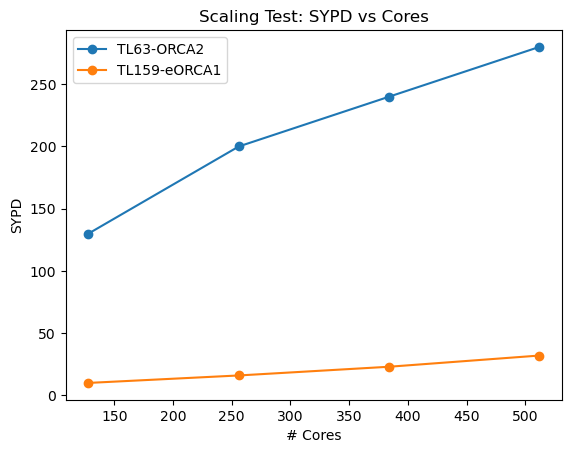

In [4]:
gridlist = ['TL63-ORCA2', 'TL159-eORCA1']
for grid in gridlist:
    values = configs[grid]
    plt.plot(values['cores'], values['sypd'], marker='o', label=grid)
plt.xlabel('# Cores')
plt.ylabel('SYPD')
plt.title('Scaling Test: SYPD vs Cores')
plt.legend()
#plt.grid(True)
plt.savefig('scaling.png')

In [6]:
values['cores'][0]

128

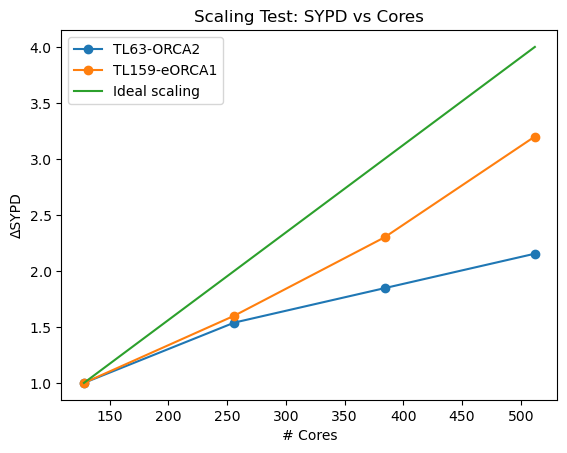

In [13]:
gridlist = ['TL63-ORCA2', 'TL159-eORCA1']
for grid in gridlist:
    values = configs[grid]
    s0 = values['sypd'][0]
    nvalues = [sypd/s0 for sypd in values['sypd']]
    ivalues = [cores/128 for cores in values['cores']]
    plt.plot(values['cores'], nvalues, marker='o', label=grid)
plt.plot(values['cores'],ivalues, '-', label='Ideal scaling')
plt.xlabel('# Cores')
plt.ylabel('ΔSYPD')
plt.title('Scaling Test: SYPD vs Cores')
plt.legend()
#plt.grid(True)
plt.savefig('scaling.png')